In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Research Question 1
### What is the number and proportion of GitHub repositories that are using GitHub Actions workflows, categorized by their main programming language?

In [29]:
## The first dataset we will use contains information about GitHub repositories that make use of GitHub Actions workflows.

df_repositories = pd.read_csv('../datasets/repositories.csv')
df_repositories

,repository,branch,language,created,updated,commit,stars,watchers,forks,size,branches,commits,contributors,issues,prs
0,00-evan/shattered-pixel-dungeon,master,Java,2014-07-31 21:56:31,2022-01-13 23:41:31,5d1a2dce6b554b40f6737ead45d411fd98f4c67d,1803,83,580,69470,1,5165,2.0,859.0,33.0
1,0015/ideasnprojects,master,C++,2019-07-04 08:16:56,2021-03-10 05:31:05,bd09568e05e2790ce3f72905995e763600ff3903,332,39,253,1315,1,144,2.0,11.0,7.0
2,0015/thatproject,master,C,2019-07-04 08:16:56,2021-12-16 20:49:19,69c85b76c285e9b532b2237fbd4244fd6e7e7820,629,68,447,2160,5,208,2.0,0.0,13.0
3,007gzs/dingtalk-sdk,master,Python,2018-05-07 09:42:31,2021-06-03 12:49:51,7979da2e259fdbc571728cae2425a04dbc65850a,148,14,48,944,1,131,7.0,38.0,13.0
4,007gzs/meeting,master,Python,2019-07-02 09:14:00,2021-04-13 05:49:08,a1bea997e2849c03e2a3cfa724d036b6769e1abb,167,6,61,1051,2,104,2.0,17.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69142,zzzprojects/sqlfiddle,master,JavaScript,2012-01-18 08:25:59,2021-04-12 19:20:03,b0014899c1701e017bd87f826e8e369d163ef574,272,29,53,18666,9,530,3.0,76.0,4.0
69143,zzzprojects/sqlfiddle2,master,JavaScript,2014-04-20 22:44:28,2021-04-12 19:20:50,eb6694a8d8f4fcdda82b88bb0f426eb978c304e5,192,17,39,2035,2,192,2.0,32.0,3.0
69144,zzzprojects/sqlfiddle3,master,JavaScript,2016-12-26 19:27:27,2021-04-12 19:27:04,d4283d80b161ede014e49ee177e7d98098f6d583,245,16,44,1717,2,196,3.0,13.0,6.0
69145,zzzprojects/z.extensionmethods,master,C#,2015-03-03 14:49:23,2021-04-06 14:42:44,bdbec3f0924a01e9f638f1ec3c975bd9ff13beb0,844,95,214,6590,1,127,3.0,19.0,14.0


### Requirements : 
#### 1-First, preprocess the dataset by filtering on repositories with at least 100 stars AND more than 1 contributors
#### 2-Quantify the number of repositories, grouped by language
    Hint: Use the groupby operation from pandas. See https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
#### 3-Quantify the proportion of repositories per language
    Hint: proportion per langage = number of repositories per language / total number of repositories

In [30]:
# filter on repositories with at least 100 stars AND more than 1 contributor
rep = df_repositories[df_repositories["stars"] >= 100][df_repositories["contributors"] > 1]
rep

,repository,branch,language,created,updated,commit,stars,watchers,forks,size,branches,commits,contributors,issues,prs
0,00-evan/shattered-pixel-dungeon,master,Java,2014-07-31 21:56:31,2022-01-13 23:41:31,5d1a2dce6b554b40f6737ead45d411fd98f4c67d,1803,83,580,69470,1,5165,2.0,859.0,33.0
1,0015/ideasnprojects,master,C++,2019-07-04 08:16:56,2021-03-10 05:31:05,bd09568e05e2790ce3f72905995e763600ff3903,332,39,253,1315,1,144,2.0,11.0,7.0
2,0015/thatproject,master,C,2019-07-04 08:16:56,2021-12-16 20:49:19,69c85b76c285e9b532b2237fbd4244fd6e7e7820,629,68,447,2160,5,208,2.0,0.0,13.0
3,007gzs/dingtalk-sdk,master,Python,2018-05-07 09:42:31,2021-06-03 12:49:51,7979da2e259fdbc571728cae2425a04dbc65850a,148,14,48,944,1,131,7.0,38.0,13.0
4,007gzs/meeting,master,Python,2019-07-02 09:14:00,2021-04-13 05:49:08,a1bea997e2849c03e2a3cfa724d036b6769e1abb,167,6,61,1051,2,104,2.0,17.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69142,zzzprojects/sqlfiddle,master,JavaScript,2012-01-18 08:25:59,2021-04-12 19:20:03,b0014899c1701e017bd87f826e8e369d163ef574,272,29,53,18666,9,530,3.0,76.0,4.0
69143,zzzprojects/sqlfiddle2,master,JavaScript,2014-04-20 22:44:28,2021-04-12 19:20:50,eb6694a8d8f4fcdda82b88bb0f426eb978c304e5,192,17,39,2035,2,192,2.0,32.0,3.0
69144,zzzprojects/sqlfiddle3,master,JavaScript,2016-12-26 19:27:27,2021-04-12 19:27:04,d4283d80b161ede014e49ee177e7d98098f6d583,245,16,44,1717,2,196,3.0,13.0,6.0
69145,zzzprojects/z.extensionmethods,master,C#,2015-03-03 14:49:23,2021-04-06 14:42:44,bdbec3f0924a01e9f638f1ec3c975bd9ff13beb0,844,95,214,6590,1,127,3.0,19.0,14.0


In [31]:
# quantify the number of repositories, grouped by language
lang = rep.groupby("language").count()
lang = lang[["repository"]]
lang

,repository
language,
C,4092
C#,3407
C++,5385
Go,4842
Java,5720
JavaScript,13062
Kotlin,1038
Objective-C,631
PHP,3915


In [32]:
# quantify the proportion of repositories per language
lang["proportion"] = lang / lang.sum()
lang

,repository,proportion
language,,
C,4092,0.061935
C#,3407,0.051567
C++,5385,0.081506
Go,4842,0.073287
Java,5720,0.086576
JavaScript,13062,0.197702
Kotlin,1038,0.015711
Objective-C,631,0.009551
PHP,3915,0.059256


## Research Question 2
### What are the top 10 most frequent events that trigger workflows, and what is the proportion of workflows using them?

In [33]:
## The second dataset we will use contains information about GitHub workflows, each reposity may define one or more workflows.

df_workflows = pd.read_csv('../datasets/workflows.csv')
df_workflows

,repository,filename,name,events,jobs
0,0101/pipetools,tests.yml,Tests,"push, pull_request",2
1,0101/pipetools,publish_docs.yml,Publish docs,push,1
2,05bit/peewee-async,ci.yml,CI,"push, pull_request",1
3,07akioni/css-render,nodejs.yml,Node.js CI,"push, pull_request",1
4,0b01001001/spectree,pythonpackage.yml,Python package,"pull_request, push",2
...,...,...,...,...,...
70273,zzzeek/alembic,run-on-pr.yaml,Run tests on a pr,pull_request,2
70274,zzzeek/sqlalchemy,run-test.yaml,Run tests,push,4
70275,zzzeek/sqlalchemy,run-on-pr.yaml,Run tests on a pr,pull_request,3
70276,zzzeek/sqlalchemy,create-wheels.yaml,Create wheel,release,3


### Requirements : 
#### 1-Split the events column (containig the triggers) and explode it 
    Hint: For the split function, see https://www.geeksforgeeks.org/python-string-split/
    For the explode function, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html
#### 2-Quantify the number of workflows grouped by event
#### 3-Quantify the proportion of workflows grouped by event
    Hint: proportion per event = number of workflows per event / total number of workflows
#### 4-Sort all events in decreasing order of proportion
#### 5-Using the order of step 4, quantify the cumulative proportion of workflows
    Hint: The cumulative proportion is calculated by dividing the cumulative frequency by the total frequency.
    See, for example, https://www.geeksforgeeks.org/cumulative-percentage-of-a-column-in-pandas-python/

In [34]:
# split the events column (containig the triggers) and explode it
df_workflows["events"] = df_workflows["events"].str.split(",")
df_workflows = df_workflows.explode("events")
df_workflows["events"] = df_workflows["events"].str.strip()
df_workflows.head()

,repository,filename,name,events,jobs
0,0101/pipetools,tests.yml,Tests,push,2
0,0101/pipetools,tests.yml,Tests,pull_request,2
1,0101/pipetools,publish_docs.yml,Publish docs,push,1
2,05bit/peewee-async,ci.yml,CI,push,1
2,05bit/peewee-async,ci.yml,CI,pull_request,1


In [35]:
# quantify the number of workflows grouped by event
g = df_workflows.groupby("events").count()[["repository"]]
g.head()

,repository
events,
branch_protection_rule,12
check_run,15
check_suite,42
create,305
delete,48


In [36]:
# quantify the proportion of workflows grouped by event
g["proportion"] = g / g.sum()
g.head()

,repository,proportion
events,,
branch_protection_rule,12,0.000099
check_run,15,0.000123
check_suite,42,0.000346
create,305,0.002510
delete,48,0.000395


In [37]:
# sort all events in decreasing order of proportion
h = g.sort_values(by="proportion", ascending=False)
h.head()

,repository,proportion
events,,
push,51223,0.421460
pull_request,41204,0.339024
workflow_dispatch,10049,0.082683
schedule,9696,0.079778
release,3793,0.031209


In [38]:
# quantify the cumulative proportion of workflows
h["cum_prop"] = 100 * (h["proportion"].cumsum()/h["proportion"].sum())
h

,repository,proportion,cum_prop
events,,,
push,51223,0.421460,42.146013
pull_request,41204,0.339024,76.048446
workflow_dispatch,10049,0.082683,84.316710
schedule,9696,0.079778,92.294528
release,3793,0.031209,95.415388
pull_request_target,1436,0.011815,96.596921
issues,1134,0.009330,97.529970
repository_dispatch,825,0.006788,98.208776
issue_comment,676,0.005562,98.764985


## Research Question 3

The GitHub Actions marketplace classifies all published actions in a predefined set of categories (e.g., api-management, continuous-integration, publishing, utilities)
Each action has a required primary category and an optional secondary category.

### What is the number and proportion of GitHub Actions that can be found in each category?

In [39]:
## The third dataset we will use contains information about GitHub Actions that are published in GitHub marketplace.

df_actions = (
    pd.read_csv('../datasets/actions.csv')
    .assign(category=lambda d:d.apply(lambda s: eval(s.categories), axis=1))
    [['actions','category','stars','open_issues','pull_requests']]
)
df_actions

,actions,category,stars,open_issues,pull_requests
0,protontypes/continuous-reforestation,"[api-management, community]",168.0,4,0.0
1,phillipdupuis/pydantic-to-typescript,"[dependency-management, api-management]",157.0,8,4.0
2,joelwmale/webhook-action,"[monitoring, api-management]",115.0,1,6.0
3,getsentry/action-github-app-token,[api-management],111.0,3,5.0
4,louisbrunner/checks-action,"[api-management, reporting]",96.0,3,1.0
...,...,...,...,...,...
9126,siacodelabs/download-from-skynet,[backup-utilities],1.0,1,0.0
9127,siacodelabs/upload-to-skynet,[backup-utilities],1.0,1,0.0
9128,zcong1993/actions-git-mirror,"[utilities, backup-utilities]",0.0,0,0.0
9129,olizilla/add-to-estuary,"[publishing, backup-utilities]",1.0,0,0.0


### Requirements : 
#### 1-Create a new column that contains the primary category of the action
#### 2-Quantify the number of actions grouped by primary category
#### 3-Quantify the proportion of action grouped by primary category
#### 4-Visualise this proportion by means of a pie chart showing the 5 most frequent categories and collapsing all other categories into "others".
    Hint: For information about pie charts, see https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html and https://stackoverflow.com/questions/48587997/matplotlib-pie-graph-with-all-other-categories

In [40]:
# create a new column that contains the primary category of the action
df_actions["primary"] = df_actions["category"].apply(lambda x: x[0])
df_actions

,actions,category,stars,open_issues,pull_requests,primary
0,protontypes/continuous-reforestation,"[api-management, community]",168.0,4,0.0,api-management
1,phillipdupuis/pydantic-to-typescript,"[dependency-management, api-management]",157.0,8,4.0,dependency-management
2,joelwmale/webhook-action,"[monitoring, api-management]",115.0,1,6.0,monitoring
3,getsentry/action-github-app-token,[api-management],111.0,3,5.0,api-management
4,louisbrunner/checks-action,"[api-management, reporting]",96.0,3,1.0,api-management
...,...,...,...,...,...,...
9126,siacodelabs/download-from-skynet,[backup-utilities],1.0,1,0.0,backup-utilities
9127,siacodelabs/upload-to-skynet,[backup-utilities],1.0,1,0.0,backup-utilities
9128,zcong1993/actions-git-mirror,"[utilities, backup-utilities]",0.0,0,0.0,utilities
9129,olizilla/add-to-estuary,"[publishing, backup-utilities]",1.0,0,0.0,publishing


In [41]:
# quantify the number of actions grouped by primary category
a = df_actions.groupby("primary").count()[["actions"]]
a.head()

,actions
primary,
ai-assisted,3
api-management,161
backup-utilities,21
chat,256
code-quality,451


In [42]:
# quantify the proportion of action grouped by primary category
a["proportion"] = a / a.sum()
a.head()

,actions,proportion
primary,,
ai-assisted,3,0.000329
api-management,161,0.017632
backup-utilities,21,0.002300
chat,256,0.028036
code-quality,451,0.049392


<Axes: ylabel='actions'>

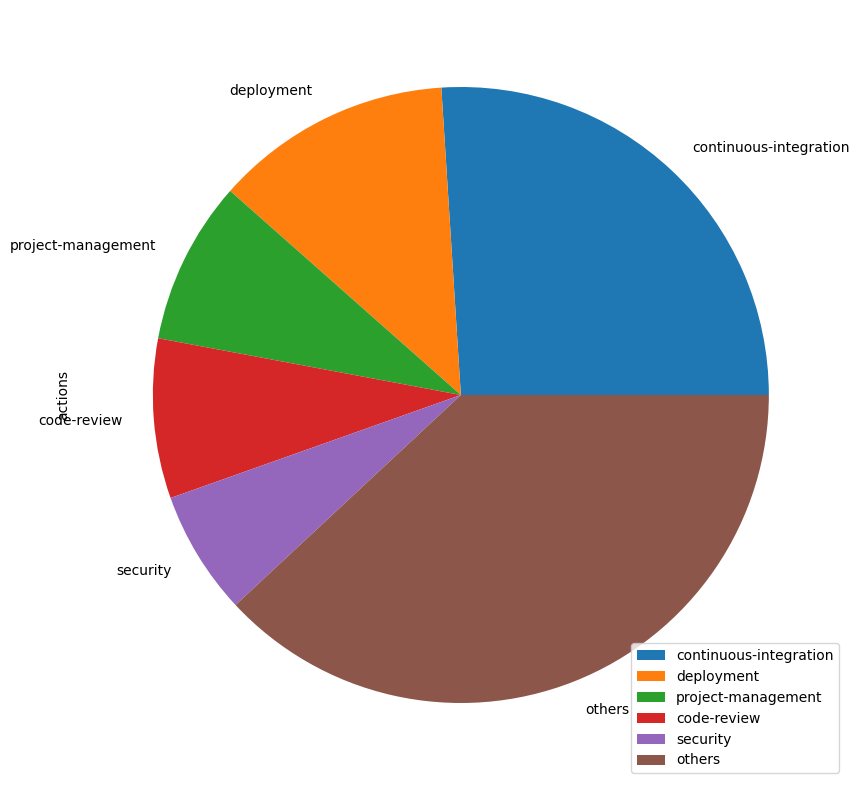

In [43]:
# visualise this proportion by means of a pie chart showing the 5 most frequent categories and collapsing all other categories into "others"
prop_actions = a.sort_values(by="proportion", ascending=False)
b = prop_actions.iloc[:5]
c = prop_actions.iloc[5:].sum()
d = pd.concat([b, pd.DataFrame([c], columns=["actions"], index=["others"])])
d.plot.pie(y="actions", figsize=(10,10))